# Logistic Regression

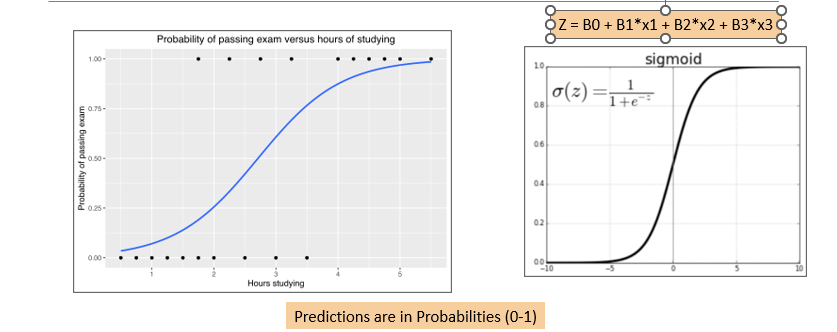

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Species is the target

In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## This is a multiclass classififcation problem we need to predict more than 2 classes

## Step 2 - Perform basic data quality checks

In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df.shape

(150, 5)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [7]:
m = df.isna().sum()
m

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
m[m > 0]

Series([], dtype: int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
a = df["species"].value_counts()
a

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for species'}, xlabel='species'>

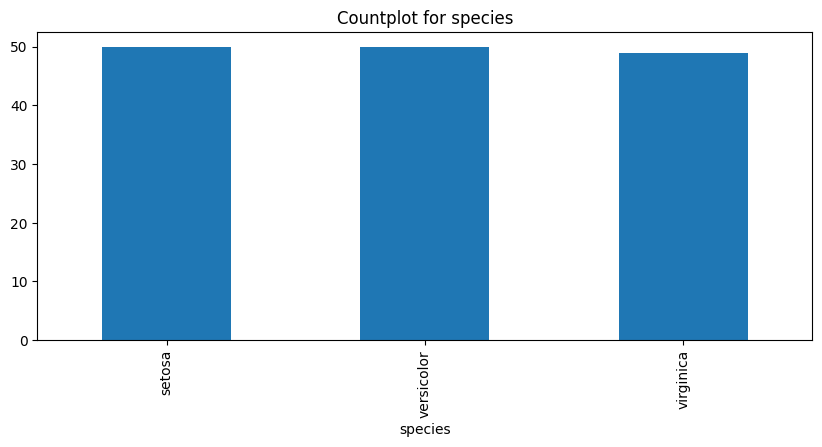

In [11]:
a.plot(kind="bar", figsize=(10,4), title="Countplot for species")

## Step 3 - Separate X and Y (Species)

In [12]:
X = df.drop(columns=["species"])
Y = df["species"]

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Step 4 - Apply train test split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.33, random_state=21
)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
117,7.7,3.8,6.7,2.2
55,5.7,2.8,4.5,1.3


In [17]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2


In [18]:
ytrain.head()

52     versicolor
49         setosa
65     versicolor
117     virginica
55     versicolor
Name: species, dtype: object

In [19]:
ytest.head()

92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [22]:
xtrain.shape, ytrain.shape

((99, 4), (99,))

In [23]:
xtest.shape, ytest.shape

((50, 4), (50,))

## Step 5 - Apply Preprocessing on X

In [24]:
xtrain.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [27]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
).set_output(transform="pandas")

In [ ]:
num_pipe.fit(xtrain) # type: ignore

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [ ]:
xtrain_pre = num_pipe.transform(xtrain) # type: ignore
xtest_pre = num_pipe.transform(xtest) # type: ignore

In [30]:
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.228059,0.047378,0.616798,0.356416
49,-1.032194,0.516425,-1.354794,-1.323832
65,0.990137,0.047378,0.335142,0.227166
117,2.179744,1.689042,1.630760,1.261165
55,-0.199469,-0.656192,0.391473,0.097917


In [31]:
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.080509,-1.125239,0.109817,-0.031333
44,-0.913233,1.689042,-1.073138,-1.065332
7,-1.032194,0.750949,-1.298463,-1.323832
21,-0.913233,1.454519,-1.298463,-1.065332
95,-0.199469,-0.187145,0.222480,-0.031333


## Step 6 - Build different models

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=42)
scores = cross_val_score(model1, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [33]:
scores.mean()

np.float64(0.9697924297924299)

In [34]:
scores.std()

np.float64(0.04092286096310744)

In [35]:
model1.fit(xtrain_pre, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
model1.score(xtrain_pre, ytrain)

0.9797979797979798

In [37]:
model1.score(xtest_pre, ytest)

0.94

In [38]:
ypred_train = model1.predict(xtrain_pre)
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [39]:
ytrain.head()

52     versicolor
49         setosa
65     versicolor
117     virginica
55     versicolor
Name: species, dtype: object

In [40]:
ypred_test = model1.predict(xtest_pre)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [41]:
ytest.head()

92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [42]:
yprob_train = model1.predict_proba(xtrain_pre)
yprob_train[0:5]

array([[5.93255838e-03, 6.68652095e-01, 3.25415347e-01],
       [9.63394703e-01, 3.66040991e-02, 1.19811448e-06],
       [1.68732822e-02, 8.33438846e-01, 1.49687871e-01],
       [1.00430329e-04, 2.39595930e-02, 9.75939977e-01],
       [2.76284551e-02, 8.40126353e-01, 1.32245191e-01]])

In [44]:
yprob_test = model1.predict_proba(xtest_pre)
yprob_test[0:5]

array([[1.95104743e-02, 9.16786651e-01, 6.37028744e-02],
       [9.88306624e-01, 1.16923316e-02, 1.04466838e-06],
       [9.72838605e-01, 2.71604729e-02, 9.22516069e-07],
       [9.87455751e-01, 1.25434844e-02, 7.64479250e-07],
       [8.63599857e-02, 8.59081299e-01, 5.45587151e-02]])

In [45]:
model1.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
from sklearn.metrics import f1_score

f1_train = f1_score(ytrain, ypred_train, average="macro")
f1_train

0.9800950683303625

In [47]:
f1_test = f1_score(ytest, ypred_test, average="macro")
f1_test

0.9374389051808407

In [48]:
gen_error = abs(f1_train - f1_test)
print(gen_error)

0.04265616314952181


In [50]:
results = []

def evaluate_and_log_model_class(results, model, xtrain, ytrain, xtest, ytest, description):
    # Cross validate results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
    cv_mean = scores.mean().round(4)
    cv_std = scores.std().round(4)
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate f1 macro on train and test
    f1_train = round(f1_score(ytrain, ypred_train, average="macro"), 4) # type: ignore
    f1_test = round(f1_score(ytest, ypred_test, average="macro"), 4) # type: ignore
    # Get the generalization error
    gen_error = round(abs(f1_train - f1_test), 4)
    # Store above results in a dictionary
    r = {
        "description" : description,
        "model" : type(model).__name__,
        "cv_mean": cv_mean,
        "cv_std" : cv_std,
        "f1_train" : f1_train,
        "f1_test" : f1_test,
        "gen_error" : gen_error
    }
    print(r)
    results.append(r)
    return model


In [51]:
model1 = evaluate_and_log_model_class(
    results, LogisticRegression(random_state=42), xtrain_pre, ytrain, xtest_pre, ytest, description="Logistic Regression Baseline"
)

{'description': 'Logistic Regression Baseline', 'model': 'LogisticRegression', 'cv_mean': np.float64(0.9698), 'cv_std': np.float64(0.0409), 'f1_train': 0.9801, 'f1_test': 0.9374, 'gen_error': 0.0427}


In [52]:
results

[{'description': 'Logistic Regression Baseline',
  'model': 'LogisticRegression',
  'cv_mean': np.float64(0.9698),
  'cv_std': np.float64(0.0409),
  'f1_train': 0.9801,
  'f1_test': 0.9374,
  'gen_error': 0.0427}]

## Decision Tree Classification

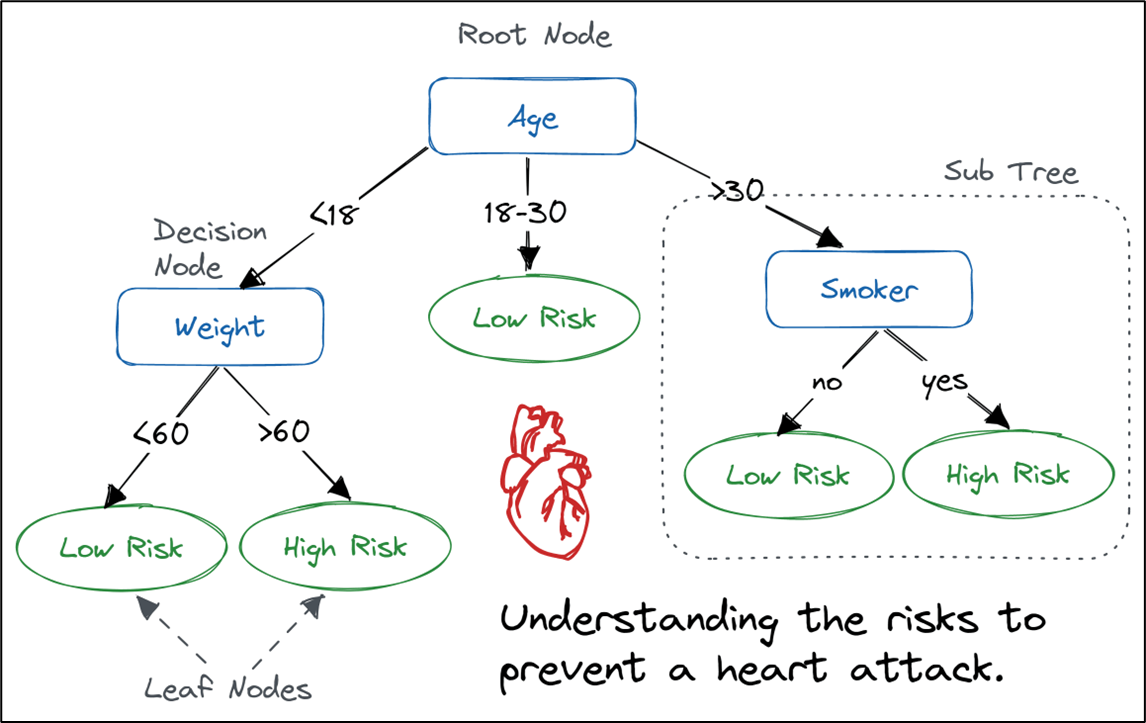

In [55]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy",
    random_state=42
)
model2.fit(xtrain_pre, ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
model2.score(xtrain_pre, ytrain)

0.6666666666666666

In [57]:
model2.score(xtest_pre, ytest)

0.66

In [58]:
params = {
    "max_depth" : [2,3,4,5,6],
    "min_samples_split":[5,6,7,8,9,10],
    "min_samples_leaf":[5,6,7,8,9,10],
    "criterion":["gini", "entropy"]
}

In [59]:
params

{'max_depth': [2, 3, 4, 5, 6],
 'min_samples_split': [5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 6, 7, 8, 9, 10],
 'criterion': ['gini', 'entropy']}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

rscv_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=params,
    cv=5,
    scoring="f1_macro",
    random_state=42
)
rscv_dt.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [61]:
rscv_dt.best_score_

np.float64(0.9299833499833501)

In [62]:
best_dtc = rscv_dt.best_estimator_
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
dtc_sel = evaluate_and_log_model_class(
    results, best_dtc, xtrain_pre, ytrain, xtest_pre, ytest,
    description="Tuned Decision Tree Classification"
)

{'description': 'Tuned Decision Tree Classification', 'model': 'DecisionTreeClassifier', 'cv_mean': np.float64(0.93), 'cv_std': np.float64(0.0241), 'f1_train': 0.9701, 'f1_test': 0.9374, 'gen_error': 0.0327}


In [64]:
dtc_sel

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


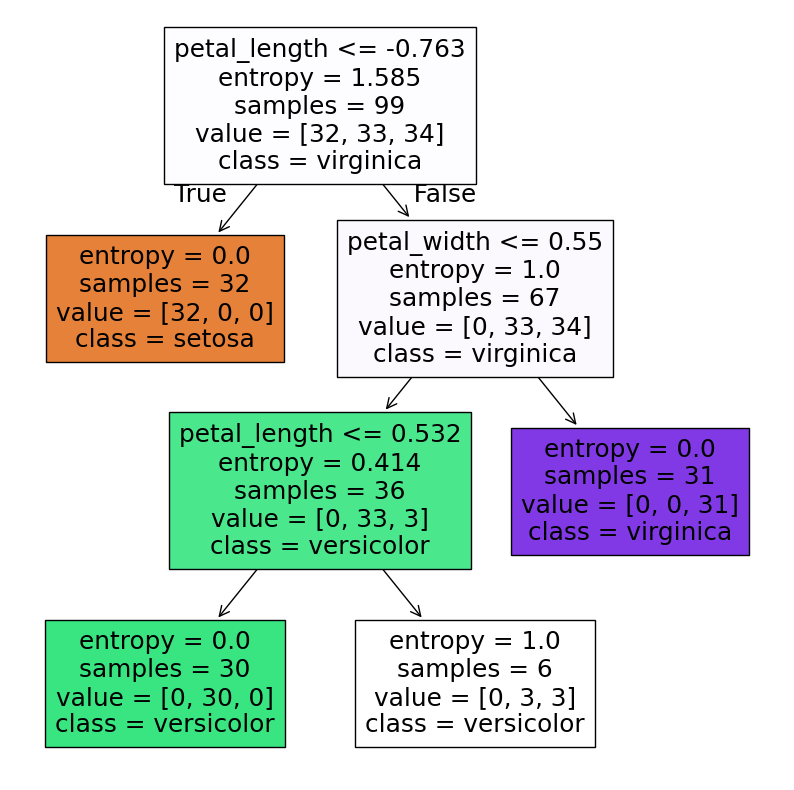

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(dtc_sel, feature_names=xtrain.columns, class_names=dtc_sel.classes_, filled=True)
plt.show()

In [66]:
dtc_sel.feature_importances_

array([0.        , 0.        , 0.65471818, 0.34528182])

In [67]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [68]:
imp = pd.Series(dtc_sel.feature_importances_, index=xtrain.columns)
imp.sort_values(ascending=False)

petal_length    0.654718
petal_width     0.345282
sepal_width     0.000000
sepal_length    0.000000
dtype: float64

<Axes: >

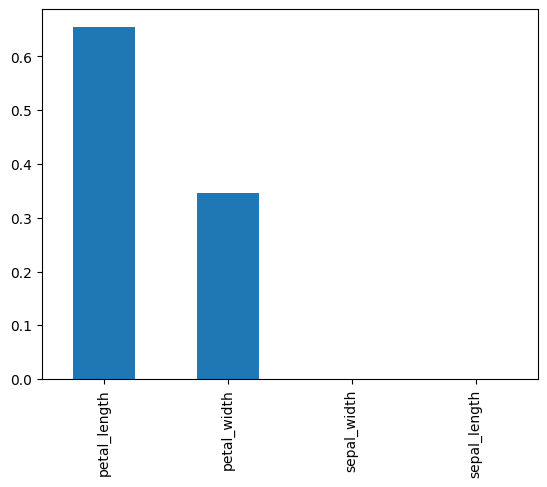

In [69]:
imp.sort_values(ascending=False).plot(kind="bar")

In [70]:
results

[{'description': 'Logistic Regression Baseline',
  'model': 'LogisticRegression',
  'cv_mean': np.float64(0.9698),
  'cv_std': np.float64(0.0409),
  'f1_train': 0.9801,
  'f1_test': 0.9374,
  'gen_error': 0.0427},
 {'description': 'Tuned Decision Tree Classification',
  'model': 'DecisionTreeClassifier',
  'cv_mean': np.float64(0.93),
  'cv_std': np.float64(0.0241),
  'f1_train': 0.9701,
  'f1_test': 0.9374,
  'gen_error': 0.0327}]

In [71]:
eval_df = pd.DataFrame(results)
eval_df

,description,model,cv_mean,cv_std,f1_train,f1_test,gen_error
0,Logistic Regression Baseline,LogisticRegression,0.9698,0.0409,0.9801,0.9374,0.0427
1,Tuned Decision Tree Classification,DecisionTreeClassifier,0.9300,0.0241,0.9701,0.9374,0.0327


In [72]:
eval_sort = eval_df.sort_values(by="gen_error")
eval_sort

,description,model,cv_mean,cv_std,f1_train,f1_test,gen_error
1,Tuned Decision Tree Classification,DecisionTreeClassifier,0.9300,0.0241,0.9701,0.9374,0.0327
0,Logistic Regression Baseline,LogisticRegression,0.9698,0.0409,0.9801,0.9374,0.0427


In [ ]:
eval_sort.to_csv("evaluation.csv", index="False") # type: ignore

## Based on the above results I am choosing Decision tree based on less generalization error

## Evaluate decision tree in detail

In [74]:
# accuracy in train
dtc_sel.score(xtrain_pre, ytrain)

0.9696969696969697

In [75]:
# accuracy in test
dtc_sel.score(xtest_pre, ytest)

0.94

In [76]:
ypred_train = dtc_sel.predict(xtrain_pre)
ypred_test = dtc_sel.predict(xtest_pre)

In [77]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [78]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

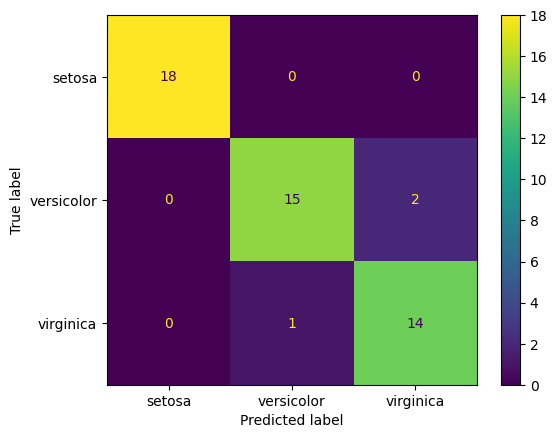

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dtc_sel, xtest_pre, ytest)

In [80]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.88      0.91        17
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



## Apply out of sample prediction

In [81]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [82]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [83]:
xnew_pre = num_pipe.transform(xnew) # type: ignore
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.437391,-1.359762,0.109817,0.097917
1,1.228059,0.047378,0.729461,1.390415
2,-0.913233,-1.359762,-0.453495,-0.160583
3,-1.745958,-0.421668,0.335142,-1.323832
4,0.038452,-0.187145,0.729461,0.744166
5,-0.437391,0.985472,-1.411125,-1.323832
6,-0.318430,-0.187145,-0.115507,0.097917
7,0.752216,-0.187145,0.785792,1.002666
8,-0.675312,1.454519,-1.298463,-1.323832
9,-0.913233,0.750949,-1.298463,0.097917


In [84]:
preds = dtc_sel.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [85]:
probs = dtc_sel.predict_proba(xnew_pre)
probs

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5]])

In [86]:
dtc_sel.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [87]:
xnew["species_pred"] = preds
xnew[dtc_sel.classes_] = probs.round(4)

In [88]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,1.0,0.0
1,6.9,3.1,5.1,2.3,virginica,0.0,0.0,1.0
2,5.1,2.5,3.0,1.1,versicolor,0.0,1.0,0.0
3,4.4,2.9,NaN,0.2,versicolor,0.0,1.0,0.0
4,5.9,3.0,5.1,1.8,virginica,0.0,0.0,1.0
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
6,5.6,NaN,3.6,1.3,versicolor,0.0,1.0,0.0
7,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0,0.0


In [89]:
xnew["species_pred"].value_counts()

species_pred
versicolor    8
virginica     4
setosa        3
Name: count, dtype: int64

<Axes: xlabel='species_pred'>

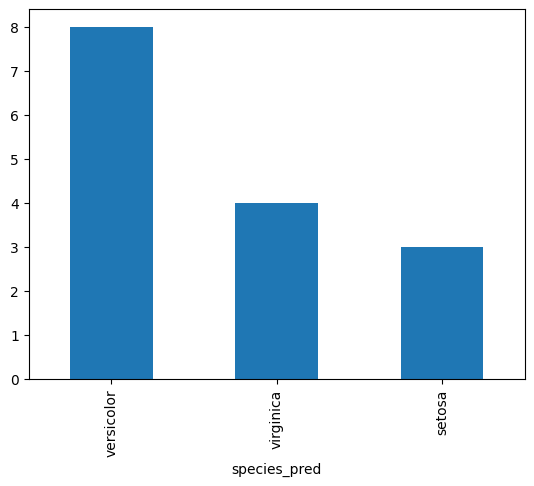

In [90]:
xnew["species_pred"].value_counts().plot(kind="bar")

In [91]:
xnew.to_csv("dtc_results.csv", index=False)

## Save the preprocessor and model object

In [92]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [93]:
dtc_sel

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [94]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [95]:
joblib.dump(dtc_sel, "dtc_model.joblib")

['dtc_model.joblib']

## Load the model and preprocessor

In [96]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [97]:
m = joblib.load("dtc_model.joblib")
m

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,7
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [98]:
m.score(xtrain_pre, ytrain)

0.9696969696969697

In [99]:
m.score(xtest_pre, ytest)

0.94